## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 35 columns):
DAMAGE_PROPERTY       8308 non-null float64
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 1 columns):
DAMAGE_PROPERTY    8308 non-null float64
dtypes: float64(1)
memory usage: 65.0 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 34 columns):
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP       8308 non-null float64
WOOD_WETLAND_PR

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
 0.5790
 0.1532
 0.2814
[torch.DoubleTensor of size 8308x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
 0.5451 -0.2386  0.6373  ...  -1.0297  0.1597 -1.5301
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.DoubleTensor of size 8308x34]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
 0.5451 -0.2386  0.6373  ...  -1.0297  0.1597 -1.5301
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.FloatTensor of size 8308x34]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

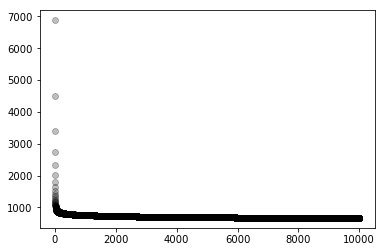

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8308)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

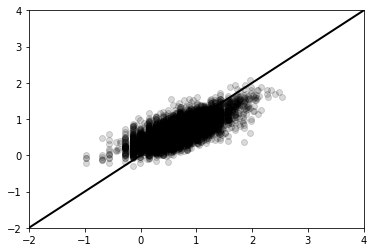

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 1 columns):
DAMAGE_PROPERTY    2808 non-null float64
dtypes: float64(1)
memory usage: 22.0 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 34 columns):
DURATION_SECONDS      2808 non-null float64
BEGIN_LAT             2808 non-null float64
BEGIN_LON             2808 non-null float64
TOR_LENGTH            2808 non-null float64
TOR_WIDTH             2808 non-null float64
YEAR                  2808 non-null float64
MULTI_VORT_IND        2808 non-null int64
OPEN_WATER_PROP       2808 non-null float64
DEV_OPEN_PROP         2808 non-null float64
DEV_LOW_PROP          2808 non-null float64
DEV_MED_PROP          2808 non-null float64
DEV_HIGH_PROP         2808 non-null float64
BARREN_LAND_PROP      2808 non-null float64
DECID_FOREST_PROP     2808 non-null float64
EVERGR_FOREST_PROP    2808 non-null float64
MIXED_FOREST_PROP     2808 non-null float64
SHRUB_SCRUB_PROP      2808 non-null float64
GRASS_LAND_PROP       2808 non-null float64
PASTURE_HAY_PROP      2808 non-null float64
CULT_CROPS_PROP       2808 non-null float64
WOOD_WETLAND_PR

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 280.5448
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2808)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

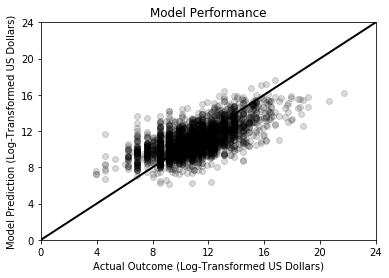

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [23]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
 2.8760e-01  2.6690e-02  1.3181e-01 -7.0418e-01 -5.0968e-01  5.0629e-02
 2.3576e-01  1.8213e-01  2.2927e-01  8.1165e-02 -3.0428e-02 -1.3244e-01
-2.2107e-01 -3.3756e-01  1.8263e-01 -2.4225e-01  9.6292e-02 -3.2783e-01
 1.0360e-01  4.1348e-01  1.9791e-01  1.8433e-01 -9.1387e-02 -2.8825e-01
-1.1959e-01  9.3159e-02 -1.5295e-01  2.7777e-02  6.9838e-03 -2.2111e-01
-1.1891e-01 -1.4455e-01  1.3310e-01 -1.5522e-01  1.3243e-01  2.4384e-01
 1.7770e-01  1.5362e-01  2.3746e-01  1.4191e-01  1.3279e-01  8.4160e-02
-1.7455e-01  2.7897e-01  3.1699e-01 -3.5738e-02  1.3557e-01 -3.7765e-01
 1.4321e-01  2.0082e-01  4.3016e-01  4.2816e-02 -1.1485e-01  2.7489e-02
 7.1353e-02  5.5547e-02  2.6144e-01  6.4005e-02 -8.3718e-02 -2.0195e-01
 4.7302e-01 -4.2335e-01 -2.3953e-01 -1.8894e-01  5.0264e-01  2.3198e-01
-2.8076e-01  4.5053e-02  1.0338e-01  3.2378e-01 -4.2484e-01  7.7977e-02
-4.6885e-02  1.2922e-01  8.2273e-02  4.9396e-02 -9.0214e-02 -2.6048e-01
-7.6699e-02 -2.3493e-02  

In [24]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1700 -0.2199 -0.2210  0.2117 -0.2754 -0.2116  0.2370  0.1873  0.2601 -0.2207

Columns 10 to 19 
 0.1463 -0.2464 -0.2190 -0.1946  0.2564  0.2949 -0.2382  0.1563  0.1609  0.1694

Columns 20 to 22 
 0.1756 -0.1987  0.2743
[torch.FloatTensor of size 1x23]

## Round 2: Two-Hidden-Layer Neural Network

In [25]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [26]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [27]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

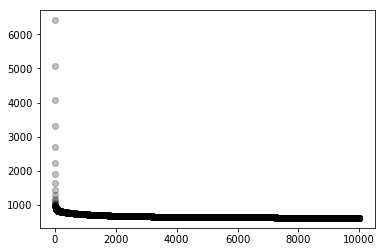

In [28]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

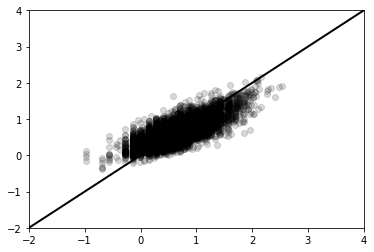

In [30]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [31]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 294.9597
[torch.FloatTensor of size 1]

In [32]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

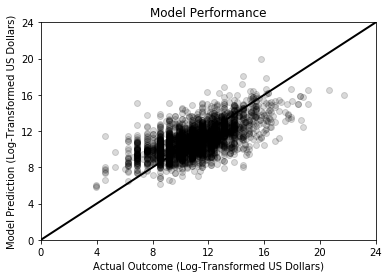

In [33]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [34]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.2038 -0.1176 -0.1945  0.1376 -0.0954 -0.0459  0.5919 -0.1986  0.1935 -0.0400
 0.1028 -0.2730 -0.0106  0.1245 -0.0522 -0.0406 -0.3816  0.0492  0.0681 -0.1029
-0.1347 -0.0294  0.0698  0.1840 -0.2101  0.0690 -0.6823  0.0325 -0.1252  0.0961
 0.0766 -0.1167  0.0421  0.3487  0.0708  0.0931 -0.0332 -0.0383 -0.0380 -0.0275
 0.1564  0.4476  0.2214  0.0529  0.0075 -0.3467 -0.0538  0.0129 -0.1059  0.1093
-0.2007 -0.0565  0.0788  0.2578 -0.2845  0.0971 -0.9849 -0.0054  0.0327 -0.0918
-0.0525 -0.0658 -0.1670 -0.3273 -0.1045  0.0239  0.2445 -0.1411 -0.0835 -0.1624
 0.1159  0.3255  0.2659  0.1202  0.1629 -0.1715  0.4954 -0.0368 -0.1927  0.0552
 0.0936 -0.0653  0.0736 -0.0296 -0.0897 -0.0101  0.3663 -0.1356  0.0359  0.0379
 0.0051 -0.1744  0.3047  0.0857 -0.1092  0.0661 -0.4624  0.0935  0.0741  0.0710
-0.1904  0.5695 -0.0173 -0.1109 -0.0782 -0.0696  0.2088  0.0267  0.0293 -0.0653
-0.0555  0.2265  0.2009  0.0867  0.0566 -0.0749 -0.1755  0.0266  0.0387  0.0590
 

In [35]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2882  0.1814 -0.0429  0.2323  0.1514  0.0222 -0.3134  0.0304  0.2063  0.2587
-0.1204 -0.2734 -0.2480  0.0370  0.3573  0.0498 -0.0366 -0.6298 -0.2311  0.1828
-0.0258 -0.1588  0.3360  0.2041  0.0461  0.0549 -0.1262  0.1087  0.0355 -0.1303
 0.1479 -0.0028 -0.3716  0.2252  0.7065  0.1000  0.0040  0.2958 -0.2419 -0.0600
-0.3746 -0.8507  0.3104  0.0120 -0.4236 -0.0465  0.3222 -0.0115 -0.3347 -0.0977
-0.0025 -0.3347  0.3493  0.2556  0.0892 -0.0530 -0.0642  0.1157 -0.0025 -0.8324
-0.0509  0.0438  0.0514  0.2030  0.0525  0.2409 -0.1889  0.1567 -0.0715  0.0572
-0.3716 -0.5081  0.0604  0.4314  0.4559 -0.3213  0.1080  0.2274  0.0691 -0.0248
 0.0237 -0.2873  0.0173  0.1531  0.3710 -0.3143  0.4903 -0.0878 -0.2563  0.2744
-0.1926  0.1230  0.2987  0.0392  0.2446 -0.0781 -0.0172  0.2533  0.0487 -0.0221
-0.0706  0.1703  0.0638 -0.3593  0.1637  0.3220  0.0132  0.2946 -0.1281 -0.3052
 0.0329  0.3401 -0.0494 -0.1070 -0.1958 -0.5541  0.1950  0.1301  0.0436  0.0847
-

In [36]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1177 -0.2721  0.6519 -0.1769 -0.5377 -0.6126  0.0636  0.3173 -0.7966  0.3210

Columns 10 to 14 
-0.3327  0.2911  0.3164 -0.5945  0.1787
[torch.FloatTensor of size 1x15]

## Round 3: Three-Hidden-Layer Neural Network

In [37]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [38]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [39]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

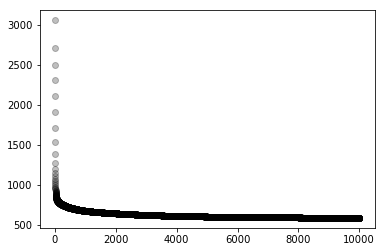

In [40]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

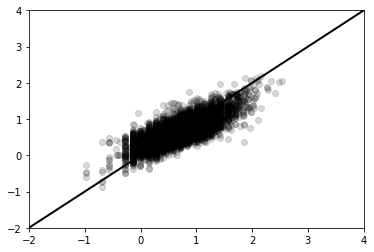

In [42]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [43]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 312.9840
[torch.FloatTensor of size 1]

In [44]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

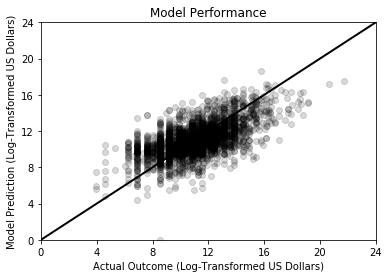

In [45]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [46]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.4996 -0.2623 -0.1694 -0.2384 -0.0951 -0.0988  0.4142 -0.0822  0.0773  0.2291
 0.1447  0.0608  0.0406  0.2838 -0.3328 -0.0871  0.0681  0.1239  0.3116  0.0251
 0.0532  0.3259  0.3322  0.1901 -0.1162  0.0007  0.0161 -0.1361 -0.0220  0.1242
-0.0621  0.0334  0.1554  0.0982 -0.1676  0.3346 -0.3664 -0.1544  0.1711 -0.0429
-0.0619  0.0862  0.0236  0.0737  0.0307 -0.3184  0.7592  0.0744  0.0239 -0.0148
 0.3134 -0.0466  0.1774 -0.0323 -0.0307  0.0600  0.5508 -0.0335  0.4585 -0.1726
 0.0398 -0.4550 -0.0515  0.1203  0.0336  0.1108 -0.5884  0.1543  0.0797  0.0243
 0.1502  0.3750  0.0883  0.0942 -0.0372  0.1775  0.6957  0.0864  0.1379 -0.2304
 0.1650  0.0748 -0.2372  0.0340  0.2611 -0.1863 -0.4840  0.0683 -0.1910  0.0775
-0.0665  0.0107  0.0312 -0.3217  0.1480 -0.2482 -0.5994  0.2090 -0.1271 -0.0387
 0.0799 -0.1983  0.2028  0.0921  0.2438  0.0811 -0.6979 -0.4477  0.0967 -0.1885
-0.1146  0.1002 -0.0853  0.2259  0.0390  0.0597 -0.2558 -0.2127  0.1360  0.2350
 

In [47]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1837 -0.2972  0.2230  0.1137  0.0416  0.4971  0.3044  0.2368 -0.0861 -0.1915
-0.1995 -0.2000  0.2045 -0.1261  0.2596  0.1641 -0.1405  0.0960 -0.2471  0.0597
 0.1429  0.2446  0.1175  0.1308 -0.0822  0.2707 -0.0287 -0.2478  0.1573  0.0971
 0.4567 -0.2112 -0.0868  0.1823  0.3763  0.4095  0.0239  0.3336  0.0761  0.1795
 0.1299  0.0815 -0.1626  0.0856 -0.0310  0.2105  0.3314  0.2814  0.0479  0.1680
-0.1815 -0.0128 -0.0235  0.1753 -0.2264  0.1028 -0.2055  0.0394  0.2378  0.3189
 0.1396  0.4729 -0.2665  0.1948  0.0885 -0.0450  0.0562  0.2548  0.5547  0.1859
 0.2709 -0.1842  0.0647  0.0796 -0.1237  0.2969  0.2651  0.3324  0.1334 -0.2476
 0.3368  0.1391 -0.1975 -0.3804  0.1509  0.0854  0.1798  0.1177 -0.1656 -0.0108
 0.1846 -0.0058 -0.0106  0.2848  0.1584  0.1728  0.4061 -0.0123 -0.1369 -0.1622
-0.2416  0.1309 -0.0100  0.1487 -0.1493 -0.0529  0.0496  0.3595  0.0988  0.1889
 0.0759 -0.6012  0.2249 -0.3512  0.0947  0.1580  0.1314  0.0886  0.0714 -0.0930
-

In [48]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.3610  0.0820 -0.2095  0.0696 -0.2812 -0.5273 -0.3559  0.0090  0.4692 -0.1099
 0.1054  0.0135  0.2302  0.2484  1.2816  0.5516  0.0255 -0.6112 -1.0968 -0.7344
-0.2437 -0.3561 -0.3270 -0.2512  0.4194 -1.0639 -0.2898  0.2685  0.0678 -0.5288
-0.1339  0.2638 -0.3362  0.1689 -0.3742 -0.6190 -0.6617  0.2178  0.0537  0.1902
 0.3335 -0.0507 -0.2937  0.1138 -0.1343 -0.7606  0.0095  0.1012  0.3215 -0.0375
 0.0822  0.0709  0.2316  0.2600  0.5670  0.4265 -0.8220  0.0315 -0.2871 -0.7286
-0.0365 -0.1255 -0.0407  0.2364 -0.0275  0.0046 -0.0321  0.0871 -1.0919 -0.0842
-0.2626 -0.4702  0.1681  0.1402  0.0692 -0.2631 -0.3519  0.2321  0.2592  0.0093
 0.3226 -0.2798 -0.0423 -0.1171 -0.2781  0.3185  0.0237 -0.0158 -0.2618  0.2730
 0.0692 -0.2007 -0.3446  0.0169 -0.1124 -0.2372 -0.0099 -0.2119 -0.6997 -0.2493

Columns 10 to 14 
-0.0778 -0.0005  0.1993 -0.0110  0.3839
-0.4855 -0.4501  0.0899 -0.0215  1.1839
 0.3726  0.1294  0.2752 -0.3113 -1.8970
 0.1510  0.4109  0.073

In [49]:
model[(6)].weight

Parameter containing:
 0.1346 -1.4028 -1.3545  0.6033  0.3038 -1.6907 -1.3898 -1.2676 -0.2131 -0.2460
[torch.FloatTensor of size 1x10]

## Round 4: Four-Hidden-Layer Neural Network

In [50]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [51]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [52]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

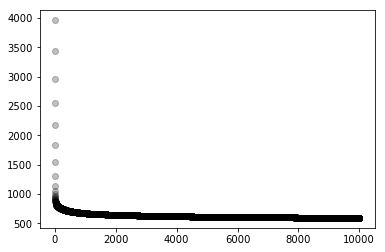

In [53]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

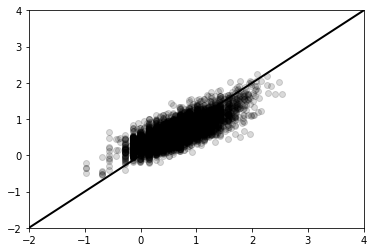

In [55]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [56]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 301.5034
[torch.FloatTensor of size 1]

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

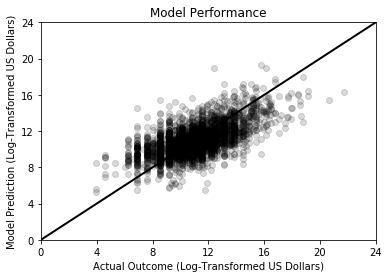

In [58]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [59]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1216 -0.2683 -0.1576  0.0725  0.2227 -0.0019  0.6746 -0.0003 -0.1329 -0.0202
-0.2758 -0.0790  0.0172  0.0562 -0.0886 -0.1830 -0.0362  0.1504 -0.1539 -0.1354
-0.1127  0.0621  0.0498 -0.0710 -0.1790 -0.1124 -0.1561  0.0906 -0.0884  0.1448
 0.0310 -0.1039 -0.1106  0.1228 -0.1496  0.1141  0.4290 -0.0018  0.2977  0.0837
 0.0422 -0.2779 -0.1457  0.2060  0.0110 -0.0301 -0.2750 -0.1837  0.3121 -0.1652
 0.1316 -0.0937  0.1549  0.1505  0.2838 -0.2455  0.7160  0.1652 -0.1554  0.1464
-0.0966  0.3766 -0.1666  0.0097 -0.0488 -0.3509 -0.4827 -0.3567  0.2342 -0.4116
 0.2346  0.0109  0.0987 -0.0745  0.1222 -0.1329  0.1372 -0.1215  0.1706  0.0750
 0.2302  0.1446  0.1026  0.2056 -0.0055 -0.1410 -0.3453  0.0880  0.1264 -0.2549
 0.1497  0.1588  0.0690 -0.0271  0.0738 -0.0356  0.2993  0.1704  0.1793 -0.0219
 0.0304 -0.1523 -0.0561 -0.0647  0.1339  0.1492  0.4715 -0.1229  0.3392 -0.3451
 0.0485  0.0623  0.1188 -0.1855 -0.0210 -0.2524 -0.0419  0.0316  0.1361 -0.1749
-

In [60]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.4161 -0.0240  0.0656 -0.1072  0.0872  0.2120  0.3104  0.2570 -0.0677 -0.0430
-0.2423 -0.1292 -0.8076  0.0377 -0.2166 -0.5742  0.0605  0.0730 -0.1753 -0.0474
-0.0393 -0.1640 -0.1941 -0.1224  0.3242  0.0359 -0.1854 -0.0287 -0.0844  0.2357
-0.2276  0.1162 -0.0530 -0.0769  0.0249 -0.0636  0.2683  0.1929 -0.0467 -0.0473
-0.1422  0.1973 -0.1501  0.0728  0.2280  0.1393 -0.1363  0.1774  0.3617  0.0432
-0.3366 -0.0695 -0.0803 -0.2382  0.0627 -0.0075  0.0730 -0.9181 -0.3546  0.2469
-0.2240 -0.3008  0.2359  0.1625  0.1047  0.3253  0.2604 -0.2328 -0.1715 -0.1236
 0.1306  0.2121  0.1150 -0.4141  0.3064  0.1876  0.0390  0.0242  0.1868  0.0734
-0.3658  0.0422 -0.0227 -0.1081 -0.0270 -0.1106 -0.0042  0.2339  0.2806 -0.1283
-0.3500 -0.0016 -0.0002 -0.0727  0.1223 -0.0199  0.1579  0.2070  0.1755  0.0979
-0.3823  0.1587 -0.2042  0.0874  0.2478  0.1872  0.0735  0.2008 -0.1784  0.0716
 0.0348  0.2756  0.1805 -0.0814 -0.1593  0.2671  0.3596  0.0721  0.0608  0.3214
 

In [61]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2085 -0.0064  0.0782 -0.1580  0.1354 -0.2867  0.5682  0.2805 -0.1978 -0.0612
 0.2917  0.0528 -0.0530  0.3434  0.2658  0.0014 -0.2894  0.0124  0.3521  0.1226
 0.1191 -0.0235 -0.1195 -0.1165 -0.2638 -0.2506 -0.1977  0.0604  0.0931  0.1024
 0.0891  0.8177 -0.2746 -0.1008  0.4176  0.3617  0.4061 -0.2175 -0.6761  0.0372
 0.3577  0.4280 -0.2113  0.2789  0.2057 -0.1923 -0.0548  0.0851  0.1636  0.1615
 0.0713 -0.2818  0.3089  0.2977 -0.1603  0.0231 -0.2122  0.1188  0.1581  0.2404
 0.1724 -0.1705  0.2859  0.0483  0.2034 -0.1525 -0.4102  0.2443  0.4442  0.0494
-0.3206 -0.4539 -0.1433 -0.0158 -0.1045 -1.7466 -0.0925 -0.8731  0.3499  0.7832
 0.3235  0.3020 -0.0554 -0.0478 -0.0957 -0.2131  0.0372  0.0557  0.3123 -0.0602
 0.1542 -0.2224 -0.0122  0.2998  0.1937 -0.2104 -0.9808 -0.1462  0.3106  0.0887

Columns 10 to 14 
-0.4032  0.0998  0.1418 -0.2917  0.3914
-0.6341  0.3342  0.2225 -0.0537  0.3338
 0.1514  0.0187 -0.2445 -0.1883  0.0156
 0.3545  0.0630 -0.168

In [62]:
model[(6)].weight

Parameter containing:
 0.0079  0.3098 -0.2550 -0.1990  0.1649  0.2839  0.2844  2.1343  0.1264  0.1734
 0.3495 -0.0809 -0.2871 -0.4957  0.0260  0.1008  0.0849  2.0482  0.1324  0.2503
 0.0217  0.2025  0.0715 -0.4801  0.1226  0.2126  0.2069  2.2053  0.1665 -0.1949
 0.3372 -0.1426 -0.2045  0.3147  0.3261 -0.2032 -0.1378 -1.1395  0.0481 -0.1873
-0.3544  0.2420  0.1906  0.8003  0.2279 -0.2716  0.1201 -0.7671 -0.3244  0.2315
-0.2998  0.1010 -0.0781 -0.5815  0.1756 -0.1110  0.3404  1.9461  0.0369  0.3017
-0.4797 -0.3406  0.1273  0.9327  0.0969  0.0728 -0.5269 -0.9674 -0.0319 -0.2883
[torch.FloatTensor of size 7x10]

In [63]:
model[(8)].weight

Parameter containing:
 0.4190  0.4314  0.0225 -0.5592 -1.0204  0.4019 -0.3167
[torch.FloatTensor of size 1x7]

## Round 5: Five-Hidden-Layer Neural Network

In [64]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [65]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [66]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

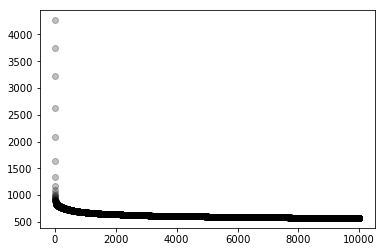

In [67]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [68]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

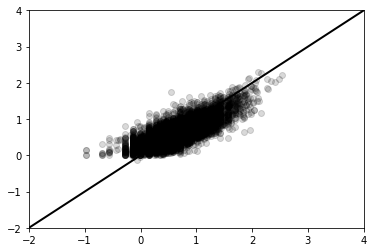

In [69]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1 Validation Set Performance

In [70]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 308.3843
[torch.FloatTensor of size 1]

In [71]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

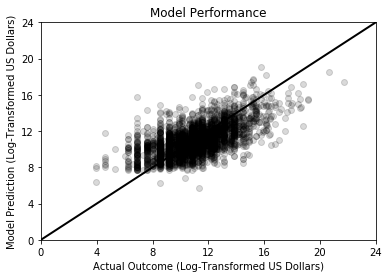

In [72]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [73]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1990 -0.2897 -0.2416  0.2964  0.1735  0.2461 -0.3368 -0.0339 -0.3388  0.0782
 0.1972  0.0161 -0.1588 -0.1437  0.0944 -0.0439 -0.5897 -0.0708  0.2629  0.1623
-0.0993  0.1122 -0.0311 -0.0008  0.2900  0.0180  0.1747  0.0114  0.0268  0.0010
-0.0107  0.1519  0.2596  0.2645 -0.1380 -0.0621  0.2531  0.2504  0.0650  0.1559
-0.0210  0.1068  0.1070  0.3072 -0.2759 -0.1245 -0.3579  0.0263  0.1399 -0.1326
 0.1458  0.1002  0.1602  0.0106 -0.1627 -0.0835 -0.2109  0.1216 -0.0246 -0.1291
-0.0273 -0.1360  0.6338  0.2117  0.0115 -0.2670  0.3529 -0.0055 -0.1026  0.1177
-0.0197 -0.0989  0.3147  0.2089  0.3066  0.3162 -0.0271 -0.1292 -0.1368  0.1451
 0.0738 -0.0451 -0.2131 -0.0559  0.0492  0.0397  0.2685 -0.0987  0.0993  0.1774
-0.1618  0.3351 -0.0866  0.3179  0.0671 -0.2553  0.7422  0.0143 -0.0181  0.0094
-0.1639 -0.0418  0.1996  0.2308 -0.1676 -0.0735  1.1406  0.0286  0.0656 -0.2377
 0.0704 -0.0265 -0.0361 -0.0506  0.0848  0.0971  0.0993  0.1826 -0.1891 -0.2612
-

In [74]:
model[(2)].weight

Parameter containing:

Columns 0 to 5 
 1.9019e-02 -2.2453e-02 -4.5486e-01  2.8094e-01  2.2054e-01  8.1711e-02
 4.0546e-01  8.6624e-02  2.1064e-02  6.4912e-02 -6.6578e-02  1.4434e-01
 3.3405e-01  4.7995e-02  2.5345e-01  2.9114e-02 -1.6735e-01  1.2821e-01
-2.7814e-02 -4.3857e-02  4.6430e-02  2.6674e-01  4.0529e-01 -1.9809e-01
 8.2829e-02  1.8853e-01  3.6831e-02 -1.8723e-01 -7.0780e-02 -3.9113e-01
 2.7975e-01  2.6167e-01  2.0449e-01 -4.6737e-04  1.9197e-01  1.9389e-01
-1.2645e-01  1.3624e-01 -5.5535e-01  8.0861e-03  3.6848e-01 -4.1799e-01
 1.9338e-03  1.0967e-01  2.7405e-01 -4.9144e-01 -2.4846e-01  8.7600e-02
 7.0924e-05  3.3287e-01  1.6683e-01 -6.1751e-02 -5.6670e-02  7.6759e-02
 4.0174e-01  9.8898e-02 -1.1630e-01  3.1286e-01  3.4947e-01  1.1433e-01
 2.0588e-01  7.7062e-02 -2.6350e-01 -4.0399e-01  2.0118e-01  4.5932e-01
 3.2595e-02  1.2366e-01 -7.9615e-02  2.4373e-02 -1.4079e-01 -9.2286e-02
 1.0635e-01 -3.0829e-01 -1.1731e-01 -2.2772e-01  1.7327e-01  2.7168e-01
 1.8515e-02  1.3434e-01  

In [75]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2389  0.0221 -0.0049 -0.3827 -0.1609  0.2325 -0.2667 -0.0491 -0.0745 -0.5995
 0.0174  0.2571  0.2302 -0.2320 -0.3035  0.0944 -0.6010  0.2230  0.2868 -0.3600
-0.0994 -0.1641 -0.0887  0.0462 -0.1232  0.1754  0.2035 -0.0105 -0.2339 -0.2862
-0.3724 -0.0908 -0.0680 -0.5140 -0.0119  0.0395  0.1217  0.2881  0.2660 -0.8418
 0.5897  0.0796 -0.1281  0.0776  0.0006  0.1366 -0.6406  0.3506  0.2409 -0.1758
 0.5944  0.3137  0.2076 -0.3975 -0.0434  0.0672 -0.8762 -0.2730  0.2817  0.0637
 0.1635  0.3033  0.1937 -0.2340 -0.7883  0.0899 -0.1755 -0.0007  0.2189 -0.3451
-0.3565  0.4924  0.1787  0.2345 -0.3255 -0.1136  0.2656 -0.1668 -0.5234 -0.2980
-0.4486  0.0775 -0.3757  0.4653  0.3934 -0.3829  0.9490  0.2823  0.0431  0.4187
 0.1909 -0.0943 -0.1592 -0.1076  0.1467 -0.1937 -0.1514 -0.1708 -0.1866 -0.0684

Columns 10 to 14 
 0.1492  0.3644  0.0213  0.0135  0.1670
-0.0159  0.2117 -0.1898  0.2476  0.2502
-0.1799 -0.1522 -0.1260 -0.0435 -0.1937
-0.4899  0.1796  1.033

In [76]:
model[(6)].weight

Parameter containing:
-1.5092 -0.3305  0.1163  0.2853  0.9358  0.2373 -0.9979 -1.0716  0.3023 -0.0675
 1.4390 -1.0259 -0.0954 -1.4754  0.3584  0.1376 -0.4146 -0.1836 -0.0018 -0.1471
-0.2137  0.0865  0.0139  0.4188  0.1924 -0.0615  0.2490 -1.6693 -1.0844  0.1222
 0.0622  0.3022 -0.2930  0.4401 -0.0940  0.2079  0.0942 -1.0766 -0.7308  0.1288
 0.3125  0.1187 -0.2699  0.3334  0.1647  0.2176 -0.0107 -1.2660 -0.2804  0.1390
 0.2496  0.3472  0.1610  0.0500  0.3677  0.3216  0.0405 -0.9760 -0.4021 -0.0212
-0.1944 -0.4724  0.2167 -0.1677 -0.2983 -0.1096 -0.3949  0.6967  0.1898  0.0592
[torch.FloatTensor of size 7x10]

In [77]:
model[(8)].weight

Parameter containing:
 1.2466 -2.9110  0.0808  0.4762  0.0307  0.4145 -2.1821
 1.5986 -2.5901  0.7293  0.4641  0.3953 -0.2299 -1.7828
 1.5322 -2.9276  0.3225  0.4432  0.3569  0.2929 -2.0651
-0.0714 -0.3586  0.2288  0.2928  0.1855 -0.3505 -0.1124
-1.0318  2.6417 -0.7323 -0.1504  0.1104  0.1538  1.8613
[torch.FloatTensor of size 5x7]

In [78]:
model[(10)].weight

Parameter containing:
 0.3950  0.3487  0.4703 -0.5729 -0.3057
[torch.FloatTensor of size 1x5]

## Round 6: Six-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

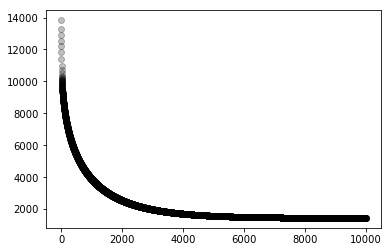

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

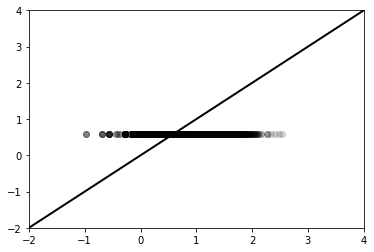

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 477.4876
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

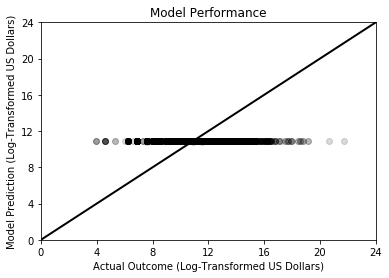

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [88]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0967  0.1426  0.0354 -0.2252 -0.2376  0.0971 -0.0965  0.1448 -0.1213  0.2226
 0.0887  0.0665  0.1021  0.1018  0.0115  0.0584 -0.1117 -0.0944  0.1370 -0.0941
-0.0103  0.1178 -0.1079  0.0868 -0.1567 -0.0678 -0.1827  0.1115 -0.0760  0.0125
 0.0365 -0.1406 -0.0539  0.1727  0.0870 -0.1403 -0.0533  0.1028 -0.0455 -0.1128
 0.0610 -0.0456  0.1686  0.0232  0.0365  0.0485  0.2081  0.0016 -0.0552 -0.0028
 0.0636 -0.1842  0.2202 -0.0076  0.1160  0.1080 -0.0259  0.0170  0.1361  0.0948
-0.0269  0.0958  0.1833  0.1415 -0.0419 -0.0430  0.1329  0.0199 -0.1101  0.0772
-0.0168  0.0420  0.1092 -0.0676  0.0367 -0.2313  0.0932  0.1389  0.2056  0.0406
-0.0415 -0.1463 -0.1557  0.1131 -0.0634  0.0885  0.1504 -0.1203  0.0366 -0.0583
 0.0202 -0.0210 -0.0820  0.1420 -0.0307 -0.0904  0.0375 -0.2044 -0.1254 -0.1996
 0.0813  0.1798 -0.1032  0.1878 -0.0790 -0.1092  0.0165 -0.1326  0.0237 -0.1506
 0.1804 -0.0818  0.1738 -0.0509 -0.0211 -0.0276  0.1248  0.1030  0.0616  0.1966
 

In [89]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0340  0.1689 -0.0441 -0.0994 -0.1161  0.1534  0.2121  0.0567 -0.0576  0.0210
 0.2299 -0.0170  0.1807  0.0763  0.0596  0.2475  0.1694  0.2386 -0.1360 -0.0508
 0.1561 -0.1181  0.1430 -0.0919 -0.1922 -0.0170 -0.0832 -0.1519  0.1924  0.0283
-0.0821 -0.0106  0.0443 -0.0810  0.1167 -0.0047  0.0312  0.1056  0.2103 -0.0646
 0.0819 -0.0665 -0.0202  0.1572  0.2320  0.1950  0.0666  0.2078  0.1451 -0.1199
-0.1052  0.0004 -0.1611 -0.0160 -0.1124  0.1671  0.1412  0.1684 -0.0380  0.1893
 0.2409  0.0871 -0.0989  0.2707 -0.0399 -0.1360 -0.0230 -0.0172  0.0400  0.2772
 0.2010 -0.0751 -0.0498 -0.1213  0.2438 -0.0644  0.0046 -0.1472  0.2159  0.2771
 0.1967  0.0857 -0.1141 -0.0119  0.1301  0.2310  0.2129  0.2514  0.2191 -0.0234
 0.2215 -0.1099  0.1295  0.1056 -0.0344 -0.1005 -0.0919  0.1502 -0.0412 -0.0091
 0.1451 -0.1008 -0.0475 -0.2120  0.1778 -0.1416 -0.2390  0.0111  0.0390 -0.2528
 0.1145 -0.0777 -0.1455  0.1781  0.0688  0.1068  0.1252  0.2510 -0.1237  0.1302
-

In [90]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1118  0.1899  0.1271 -0.0638 -0.0745  0.0599 -0.1138  0.1979  0.1307 -0.0140
-0.1094 -0.0545  0.2076 -0.2481 -0.1491  0.1840  0.1523  0.0529 -0.1870  0.1029
 0.0619  0.3128 -0.0125  0.2022  0.2219  0.1883  0.0783  0.1170  0.1897  0.1008
 0.1347  0.3282  0.2415  0.2709  0.2822  0.0585  0.2491  0.0391 -0.0276  0.2132
 0.1997 -0.2032  0.0356  0.0884 -0.1970  0.1329 -0.0294 -0.3236  0.0690 -0.2895
-0.2645 -0.0256  0.0282 -0.2270  0.1230  0.2159  0.0920  0.2428 -0.2522 -0.1122
-0.1164  0.1370  0.0790 -0.0159  0.0599 -0.0898  0.2569  0.2561  0.2329 -0.0555
 0.0488 -0.0452 -0.0943 -0.1082 -0.1678 -0.0717  0.0409 -0.0217 -0.2084  0.0452
 0.2826 -0.0267  0.2463  0.2056 -0.1179  0.1728  0.2149  0.1938 -0.1241  0.2254
 0.2440  0.1843 -0.0888 -0.1202 -0.1074  0.2511  0.2483  0.2527  0.0303 -0.1170

Columns 10 to 14 
-0.2273 -0.2828 -0.1281 -0.2538 -0.1521
 0.0631  0.1287  0.1486 -0.1101  0.0824
-0.2197  0.2001 -0.2241 -0.0123 -0.0937
 0.0460 -0.0041  0.264

In [91]:
model[(6)].weight

Parameter containing:
-0.2364  0.1895  0.1208  0.2337 -0.2643  0.0384 -0.1825 -0.0564  0.3171  0.1151
 0.1886  0.2349 -0.2340 -0.0918  0.0766  0.1455 -0.2644 -0.0067 -0.0289  0.1420
 0.1028  0.2012  0.3580  0.0941 -0.0973  0.1625 -0.2103  0.2086  0.2351 -0.2034
-0.0050 -0.1758 -0.1562 -0.2700  0.2757  0.1578 -0.2845 -0.2131 -0.0261 -0.2503
-0.1732 -0.0695  0.3197  0.2444 -0.0068 -0.2523  0.1549 -0.2429  0.1022  0.1677
-0.2340  0.2730  0.0613 -0.2696  0.1890 -0.1838 -0.1635  0.2372 -0.1328 -0.2322
-0.2535 -0.0559  0.2706 -0.2037 -0.2067 -0.0621  0.1989  0.2122 -0.2089  0.1962
[torch.FloatTensor of size 7x10]

In [92]:
model[(8)].weight

Parameter containing:
 0.0417  0.3184 -0.3008 -0.3164  0.0139 -0.3347 -0.2349
 0.0945 -0.2310  0.1147 -0.3035 -0.3726 -0.2105  0.2149
 0.3849  0.2492  0.4338 -0.3687  0.3000  0.1117 -0.2695
 0.0937 -0.1313  0.1351 -0.0012  0.3791  0.1708  0.3700
 0.1636  0.0997  0.0458  0.0018 -0.0989  0.0232  0.1193
[torch.FloatTensor of size 5x7]

In [93]:
model[(10)].weight

Parameter containing:
-0.3125 -0.3294 -0.3801  0.3251 -0.3869
 0.1233 -0.0066 -0.3062 -0.4696  0.1598
-0.3908 -0.3161 -0.0344  0.1973 -0.4026
[torch.FloatTensor of size 3x5]

In [94]:
model[(12)].weight

Parameter containing:
 0.2574 -0.3898 -0.1116
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [95]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [96]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [97]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

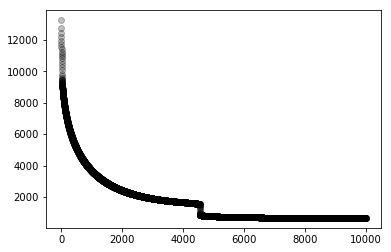

In [98]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [99]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

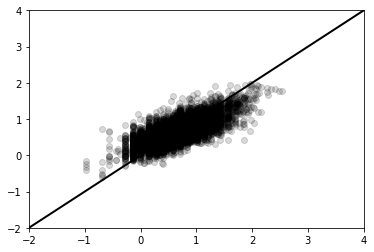

In [100]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [101]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 286.7362
[torch.FloatTensor of size 1]

In [102]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

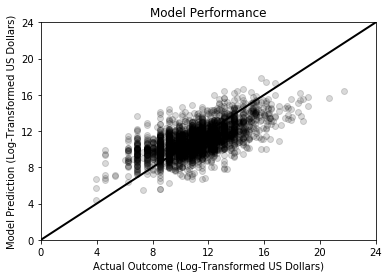

In [103]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [104]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.2461 -0.5966 -0.0631  0.1888  0.1221 -0.0922  0.6013 -0.0477 -0.2067  0.2951
 0.1043 -0.0934 -0.0897  0.0465  0.2096  0.0063 -0.5453  0.1609 -0.1711  0.1599
 0.3250  0.3941  0.3571 -0.0155  0.5124 -0.2609  0.2594 -0.2242  0.0674 -0.0164
 0.2692 -0.3794  0.0353 -0.0074  0.3529  0.2069 -0.5889  0.3096  0.2356  0.0101
 0.2657 -0.0620 -0.2316  0.3905  0.0916  0.0841  0.0301 -0.1496  0.1096  0.1341
 0.1180  0.2875  0.1888 -0.1934 -0.1359 -0.2827  0.5855 -0.1704  0.2937 -0.4130
 0.0085  0.2132  0.4058  0.0129  0.1901 -0.2681 -0.2379 -0.0180  0.2077  0.1526
-0.0941 -0.0137  0.0560  0.1828  0.2887 -0.3694  0.2331  0.2459  0.0035  0.1309
 0.2764  0.2425 -0.4798  0.2995  0.3166  0.2282 -0.3780  0.1945  0.3629 -0.1227
-0.1543  0.1245  0.2450  0.2871  0.1415 -0.3137  0.3476  0.1600 -0.1627  0.1900
 0.3922  0.5752  0.5129  0.1480  0.2007 -0.3879  0.4486 -0.1632 -0.0740 -0.0661
 0.2770 -0.0309  0.0351  0.3591  0.2880 -0.4232 -0.2962 -0.0211 -0.1389 -0.0398
 

In [105]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0499  0.0091  0.2392  0.1854  0.4268  0.0085  0.2560  0.0637  0.1763  0.0701
-0.1510  0.2470  0.0145  0.0111  0.1061  0.1849  0.2822  0.1009 -0.0865  0.1541
-0.3152  0.2895 -0.3928 -0.0383 -0.0325  0.1028  0.1690 -0.2073 -0.1280 -0.5275
-0.1908  0.1352  0.1301  0.1794  0.5527  0.0980  0.2763  0.1560 -0.2173 -0.0364
 0.2089  0.0325  0.1860  0.3710  0.4630  0.4544  0.0982  0.3390 -0.0142  0.2072
 0.0214 -0.0043  0.0052  0.2385  0.2062  0.2060  0.2877 -0.0724  0.2643  0.2104
 0.1772 -0.1301  0.1223  0.0560 -0.0169  0.1428  0.2060  0.1468  0.3505  0.2717
 0.2086  0.3048  0.0434 -0.0612  0.3818 -0.1358  0.3056  0.0686 -0.1850  0.2040
 0.2046 -0.0956  0.1221  0.1170  0.4272  0.4302  0.1713  0.3920 -0.0979  0.1180
 0.0719  0.0702  0.1205  0.2480  0.3662  0.4414  0.1389  0.0372  0.1368  0.0825
 0.2588  0.0976  0.2204  0.2218  0.3115  0.0718  0.0146  0.2560  0.1361  0.2260
-0.2950  0.4095 -0.3746 -0.3740  0.0383  0.3086  0.1365 -0.0003 -0.2241 -0.3440
-

In [106]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.4025  0.3363  0.0012 -0.0710  0.1855  0.2310  0.3487  0.2307  0.1246  0.2741
 0.2482  0.0684 -0.0714  0.2352  0.2567  0.3811 -0.0956 -0.0702  0.2221 -0.0407
 0.0050 -0.0344  0.1544  0.1894 -0.0937 -0.1614  0.0298 -0.0912 -0.2175  0.0629
 0.0929  0.1529 -0.1286  0.0311  0.1508 -0.1432 -0.2133  0.1684  0.0180  0.0848
-0.0760 -0.0733  0.1482 -0.0670  0.2850  0.4320  0.1465  0.1659  0.2163  0.2410
-0.1918  0.3791  0.5471  0.1601 -0.2425  0.3443 -0.1954  0.3804 -0.0476 -0.0006
 0.1248 -0.2898 -0.0501 -0.0836 -0.2232  0.1101 -0.0835  0.0646 -0.2890  0.0651
 0.0712  0.0847 -0.0839 -0.2494 -0.1337 -0.1551 -0.2422 -0.2885 -0.1873  0.1877
 0.3658 -0.0844  0.1272  0.2300  0.3813  0.3703 -0.0239  0.1722  0.0530  0.3993
 0.1350  0.2263 -0.5095  0.1619  0.2347  0.4181  0.0530  0.4064  0.2915  0.3031

Columns 10 to 14 
 0.1163  0.3354  0.3033  0.4612  0.4266
 0.3742 -0.8913 -0.1845 -0.7966  0.2099
 0.0137 -0.2207  0.0347 -0.1351 -0.1707
 0.1285 -0.1792  0.125

In [107]:
model[(6)].weight

Parameter containing:
 0.2934  0.5375 -0.2300  0.0790  0.1026 -0.5350 -0.1929 -0.0712  0.3015  0.3490
 0.2792  0.0244  0.0860 -0.0915  0.1303  0.5024 -0.1591  0.0313 -0.0910 -0.2525
-0.0481 -0.0749 -0.2283 -0.0150  0.3110 -0.2126  0.0902 -0.0821 -0.2849  0.0857
 0.2857  0.1833 -0.2354  0.2833 -0.0212 -0.1189  0.2745 -0.0793  0.3082  0.3831
-0.0285 -0.1723 -0.1466 -0.1681  0.3270  0.4855 -0.1252 -0.3266  0.2956 -0.2526
 0.2958  0.2342 -0.2713 -0.0425  0.4315  0.2606 -0.2211 -0.0562  0.1870  0.1336
 0.2755  0.0655  0.2813  0.0252  0.0188  0.3172 -0.2457 -0.2417  0.3920  0.1062
[torch.FloatTensor of size 7x10]

In [108]:
model[(8)].weight

Parameter containing:
 0.2411 -0.1013 -0.2832  0.2714 -0.2183  0.0280 -0.0019
 0.3414 -0.3264  0.1715  0.1822 -0.5224  0.4931  0.1661
-0.0988  0.5678  0.1552  0.0245  0.8940  0.2851  0.2330
 0.0361 -0.4035  0.3776 -0.0438  0.0489 -0.0669 -0.1889
-0.2585  0.2137 -0.0803 -0.1131  0.2481  0.3823  0.1132
[torch.FloatTensor of size 5x7]

In [109]:
model[(10)].weight

Parameter containing:
-0.2914  0.3309  0.0615  0.2099 -0.3180
-0.2166 -0.1137  0.7645 -0.1785  0.6946
-0.1272  0.5559 -0.1243 -0.3994 -0.3606
[torch.FloatTensor of size 3x5]

In [110]:
model[(12)].weight

Parameter containing:
 0.0540  0.1673 -0.1729
 0.6376 -0.6940  0.3468
[torch.FloatTensor of size 2x3]

In [111]:
model[(14)].weight

Parameter containing:
-0.5361  0.2470
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [112]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [113]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(34, 1))

In [114]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

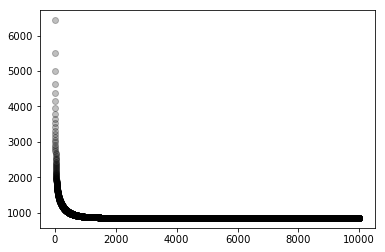

In [115]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [116]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

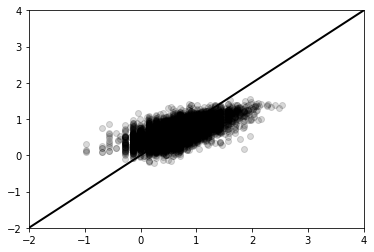

In [117]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [118]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 281.9342
[torch.FloatTensor of size 1]

In [119]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

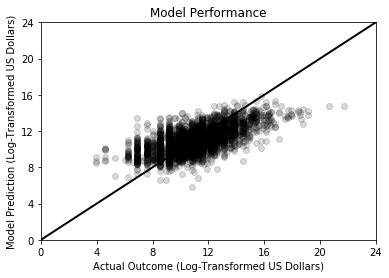

In [120]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [121]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0090  0.0196  0.0069  0.1633  0.1890 -0.0317  0.0178 -0.0062 -0.0198  0.0174

Columns 10 to 19 
-0.0127  0.0083  0.0038 -0.0214  0.0111 -0.0178 -0.0003  0.0101 -0.0055  0.0084

Columns 20 to 29 
-0.0037  0.0150  0.0127  0.0383 -0.0011  0.0280  0.0995  0.0207 -0.0112 -0.0760

Columns 30 to 33 
-0.0291  0.0208  0.0035  0.0092
[torch.FloatTensor of size 1x34]